<a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_3_Vector_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/bamacgabhann/GY4006/main/gy4006/assets/images/GY4006_logo_1.png" align=center alt="UL Geography logo"/>

# Vector Data

In the Data Types notebook, we looked at how computers can store data as text strings (str), whole number integers (int), decimal number floats (float), dates, times, and number of other formats. One we mentioned specifically was coordinates, for which I mentioned the idea of coordinates as tuples.

Coordinates don't come as single numbers. We'll look at different forms of coordinates soon, but even the simplest coordinates come as at least two numbers - an x coordinate, and a y coordinate. 

In [1]:
x_coordinate = 5
y_coordinate = 9

x_coordinate, y_coordinate

(5, 9)

This is not very useful, because we'd have to keep referencing both. Much easier use tuples so that we can store the coordinate pairs together.

In [2]:
my_coordinates = (5, 9)
my_coordinates

(5, 9)

In [3]:
type(my_coordinates)

tuple

But we can take a step further, make it even simpler - because the built-in data types like tuples aren't the only data types you can use in Python. It's very easy to define custom data types - and of course you can use custom data types that others have already defined.

The Python module Shapely already has classes which define data types for coordinates. These are the building blocks of geospatial data processing in Python. 

The same is broadly true for anything you'd be using to work with geospatial data. Whether that's QGIS or ArcGIS or Earth Engine or Felt, anything you'd be using will already have standard ways of representing coordinates - generally referred to as the geometry.

I'm most familiar with QGIS, which has its own built-in geometry definitions. ArcGIS Pro uses a JSON format for geometry - this looks a bit like a Python dictionary.

There's a couple of formats which are not software-specific, such as *Well Known Text* and *Well Known Binary*, which allow sharing of geometry information between different software or code. These are defined by the Open Geospatial Consortium (OGC), the organisation responsible for standard definitions in open geospatial data.

Often, you won't even have to think about it, because however the coordinates might be handled inside the code or software itself, they're usually being read from a file which will be in a standard format, and anything which can read those kinds of files will know how to interpret coordinates stored in them.

I'll come back to file types in a bit, but before then it's more important to actually look closer at what coordinates can represent.

We'll use Shapely in Python here - but the differences in other formats are all very minor, so this will essentially apply to anything you might be using. The precise way the numbers are presented might differ from format to format, but that's less important than the types of geometry - and those are the same across the board.

(We're also going to use geopandas to organise the data, and matplotlib to plot it).

## 1. Points

A single coordinate in isolation refers to a single Point. That's the basic building block of all coordinate systems, to be able to refer to a particular spot. We could plot this:

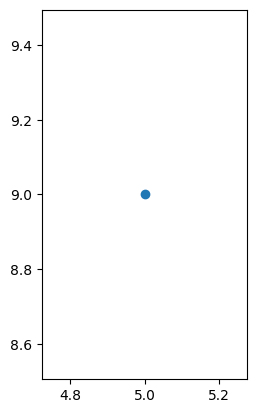

In [4]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd

gpd.GeoSeries(Point(my_coordinates)).plot()
plt.show()

We can plot multiple Point coordinates, if we want. They'll appear as separate points on the map.

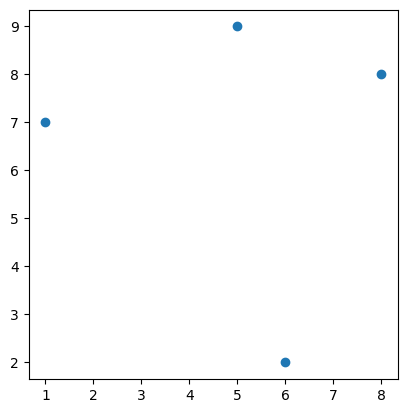

In [5]:
gpd.GeoSeries([Point(1, 7), Point(6, 2), Point(8, 8), Point(5, 9)]).plot()
plt.show()

These points could represent anything - the positions of people, or trees, or points along a cycle path; the corners of a building, or a field.

## 2. Lines

What if it is points along a cycle path, though? Is separate points the best way to show this? Might it not be better to join them up to show the actual path?

Yes, we can do that.

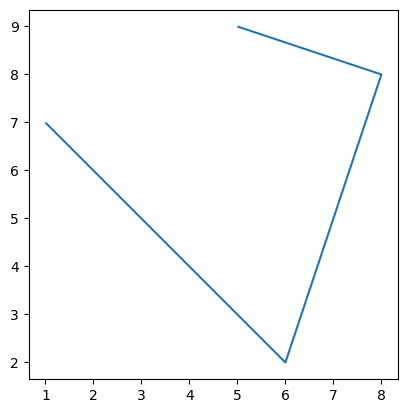

In [6]:
from shapely import LineString
gpd.GeoSeries(LineString([(1, 7), (6, 2), (8, 8), (5, 9)])).plot()
plt.show()

As I said above, in Python, the module `shapely` is used to define objects of different geometries. While tuples are a built-in basic data type in Python, shapely geometry objects such as Point and Linestring are defined within the shapely module. Once you're using that module, though, these have exactly the same validity as built-in data types like lists and tuples.

It's not just Python and shapely, though - the same is true of any geospatial software. Some may do it in different ways, but all will have defined data types for point coordinates, and for lines which are formed from multiple point coordinates.

It's a simple matter of associating the points together, so that the program understands those points aren't just individual points, but are actually connected together.

One benefit of defining a data type for this is that the order of points in the line is fixed. After all, the coordinates above could form a very different line.

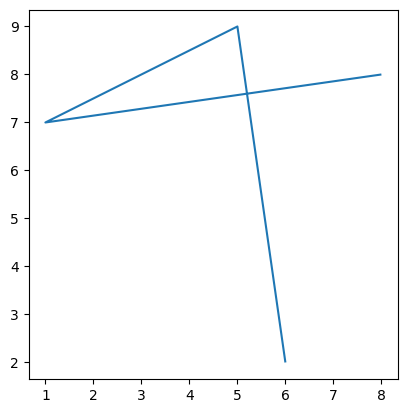

In [7]:
gpd.GeoSeries(LineString([(6, 2), (5, 9), (1, 7), (8, 8)])).plot()
plt.show()

That's the same points as the previous - just in a different order. Using a shapely Linestring object for them keeps them in an intended order, and avoids things like accidentally rearranging the points - not something you'd want to do if you're planning where to build a cycle lane, for example!

Lines will be used for cycle paths and roads, rivers, bus routes, shipping routes, the flight paths of birds or aircraft - anything which goes from one point to another.

## 3. Polygons

What if our coordinates aren't a cycle lane, but are the boundary of a field? In other words, what if the two ends of the line shouldn't just stop, but should be joined together?

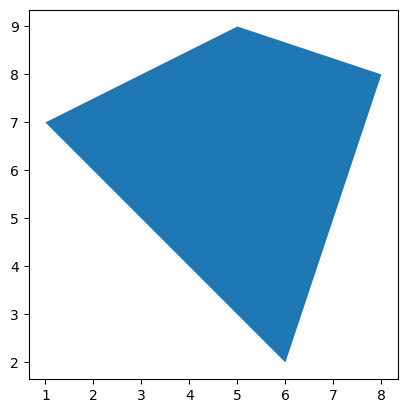

In [8]:
from shapely import Polygon
gpd.GeoSeries(Polygon([(1, 7), (6, 2), (8, 8), (5, 9)])).plot()
plt.show()

You can see in that code cell that we call these polygons. So, an open series of coordinates, where the ends are not connected to each other, would be a Line, but where they join together they form a Polygon.

These are the three fundamental geometry types in what is referred to as Vector geometry. Each of these shapes - Points, Lines, and Polygons - are defined by numerical coordinates for single points, which can remain as single points or form part of an ordered series which can be open or closed.

We can define whatever shape we want using these.

The position of a person, or a tree, the corner of a house, the centre of a roundabout, the location of a water level monitor in a river, or an air pollution monitor beside a road: Point.

The path of a cycle lane or a road, a fence, the course of a river, the trajectory of a bird in flight: Line.

The outline of a house, the area covered by a flood, the boundaries of a field, the border of a country: Polygon.

## 4. Multi-part shapes

Sometimes, you'll want to keep a collection of points together - not because they're forming a line, but because they're all part of one object. For example, a fixed set of sample locations.

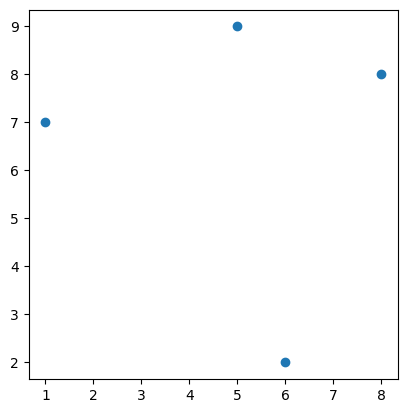

In [9]:
from shapely import MultiPoint
my_multipoint = MultiPoint([(1, 7), (6, 2), (8, 8), (5, 9)])

gpd.GeoSeries(my_multipoint).plot()
plt.show()

While this looks the same as our original points plot, it's stored as a single object, which means we can perform operations on it as a single object.

Or you might have a collection of lines. For example, a road might include a line for each side, plus lines for each lane, a cycle path, a footpath. You might have a collection of lines to represent a river network which includes tributaries, and so can't be represented by one single line.

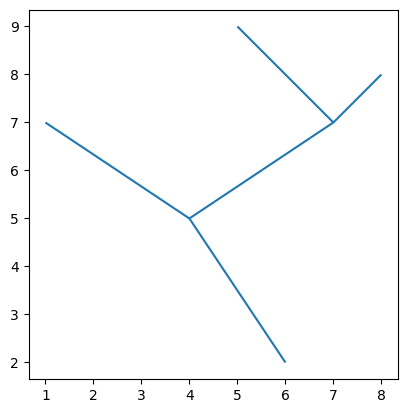

In [10]:
from shapely import MultiLineString
my_multilinestring = MultiLineString([[(6, 2), (4, 5), (7, 7), (5, 9)], [(4, 5), (1, 7)], [(7, 7), (8, 8)]])

gpd.GeoSeries(my_multilinestring).plot()
plt.show()

Likewise, you might have a collection of polygons which represent a single object - for example a property which comprises multiple buildings, or mutiple land parcels.

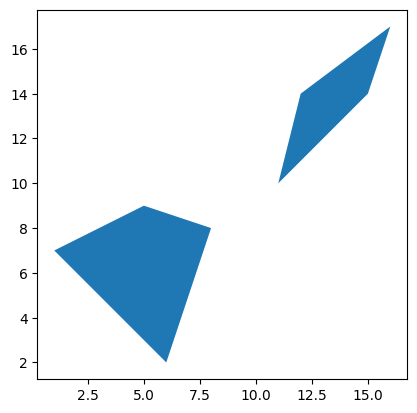

In [11]:
from shapely import MultiPolygon
my_multipolygon = MultiPolygon([[((1, 7), (6, 2), (8, 8), (5, 9))], [((12, 14), (16, 17), (15, 14), (11, 10))]])

gpd.GeoSeries(my_multipolygon).plot()
plt.show()

## 5. Summary

This isn't particularly complicated - but it is fundamental. Again, while we're using Python to demonstrate this, any geospatial programming or GIS software - QGIS, ArcGIS, or others - will be based around this same concept. Where you have data for which the shape can be defined by coordinates, this data will be represented by Point (or MultiPoint), Line/LineString (or MultiLine/MultiLineString), or Polygon (or MultiPolygon) shapes.

If you are drawing or defining your own shapes, you need to understand which data type you need. For example, if you're trying to define an area in which new trees will be planted, you won't want to use Points to define the overall boundaries of the area - and you won't want to use LineStrings to indicate the positions where the trees will be planted.

More often, you'll probably be importing data from other sources, where the data types aren't up to you. In cases such as this, though, it's still important to know what data types you're working with, because different analysis operations are possible on different kinds of shapes. So knowing what you've got means you'll know what's possible to do with it.

___

GY4006 Notebooks in Colab: 

2. Data Types <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_2_Data_Types.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Vector Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_3_Vector_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. Attribute Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_4_Attribute_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5. Coordinate Reference Systems <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_5_Coordinate_Reference_Systems.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6. Geospatial Data Files <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_6_Geospatial_Data_Files.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7. Vector Geoprocessing <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_7_Vector_Geoprocessing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8. Introduction to Raster Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_8_Introduction_To_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

9. Single-band Raster Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_9_Single-band_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10. Multi-band Raster Data: Passive Remote Sensing <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_10_Multi-band_Raster_Data-Passive_Remote_Sensing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>